# Comprehensive Assessment : Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks

To model the progression of diabetes using the available dataset from the sklearn library, we can follow a structured approach. Here’s a breakdown of the key components you can focus on:

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target
# Convert to DataFrame for easy handling
df = pd.DataFrame(X, columns=diabetes_data.feature_names)
df['target'] = y

In [2]:
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

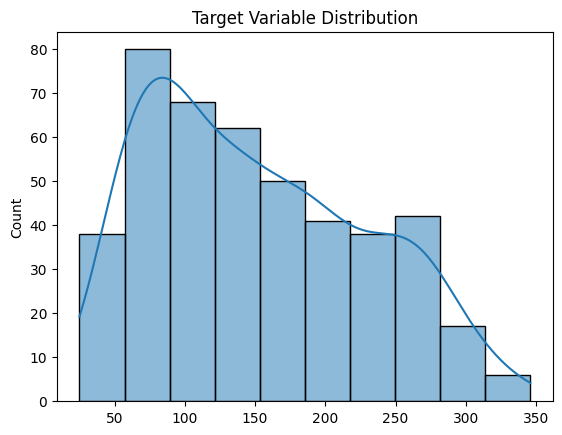

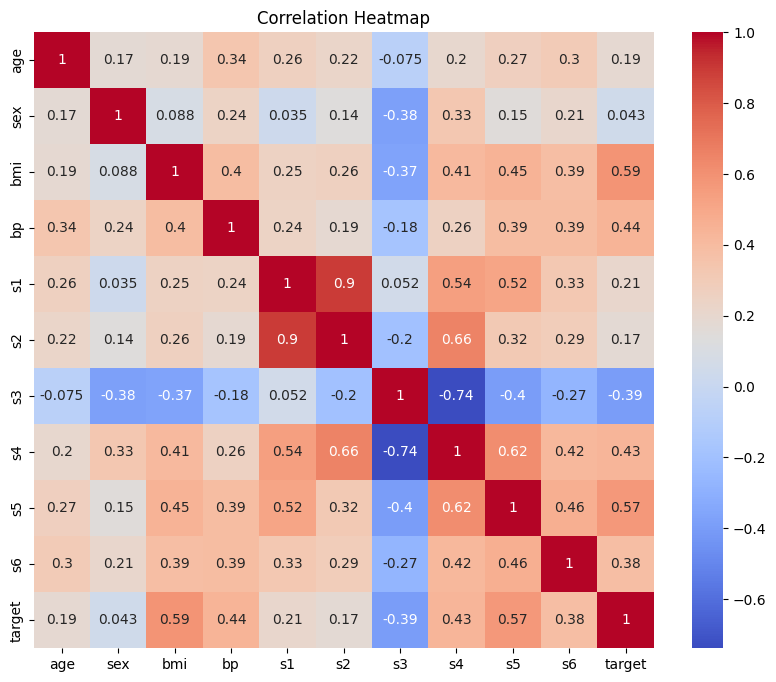

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.histplot(y, kde=True)
plt.title('Target Variable Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, input_shape=(X_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])



In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 33532.2969 - mse: 33532.2969 - val_loss: 22569.7324 - val_mse: 22569.7324
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31281.8633 - mse: 31281.8633 - val_loss: 22451.8438 - val_mse: 22451.8438
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33088.3438 - mse: 33088.3438 - val_loss: 22337.4902 - val_mse: 22337.4902
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30132.3828 - mse: 30132.3828 - val_loss: 22221.3691 - val_mse: 22221.3691
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33741.8906 - mse: 33741.8906 - val_loss: 22091.5762 - val_mse: 22091.5762
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32106.1348 - mse: 32106.1348 - val_loss: 21939.3184 - val_mse: 21939.3184
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33040.9336 - mse: 33040.9336 - val_loss: 21753.2402 - val_mse: 21753.2402
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29917.9961 - mse: 

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error: 3092.8019395551823
R² Score: 0.41624889464120807


In [12]:
# New model with additional layers
model_improved = Sequential([
    Dense(128, input_shape=(X_scaled.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the new model
model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the new model
history_improved = model_improved.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the new model
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Mean Squared Error: {mse_improved}")
print(f"Improved R² Score: {r2_improved}")


Epoch 1/100


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 28849.3438 - mse: 28849.3438 - val_loss: 22237.4336 - val_mse: 22237.4336
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31465.3086 - mse: 31465.3086 - val_loss: 21920.2090 - val_mse: 21920.2090
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29752.1348 - mse: 29752.1348 - val_loss: 21405.8438 - val_mse: 21405.8438
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29399.5059 - mse: 29399.5059 - val_loss: 20544.3594 - val_mse: 20544.3594
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30110.6250 - mse: 30110.6250 - val_loss: 19154.3477 - val_mse: 19154.3477
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25626.5117 - mse: 25626.5117 - val_loss: 16978.9336 - val_mse: 16978.9336
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21153.1016 - mse: 21153.1016 - val_loss: 13846.5605 - val_mse: 13846.5605
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18410.6797 - mse: 18410.6797 -